### Stock Price Prediction of HDFC Bank:

In [46]:
import numpy as np
import pandas as pd
import tensorflow as tf
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
# Reading CSV from Google Drive:
file_path = "/content/drive/MyDrive/HDFC_StockData.csv"
hdfc_data = pd.read_csv(file_path)

**Data Exploration and Cleaning:**

In [48]:
hdfc_data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFC,EQ,271.75,293.50,293.50,293.50,293.50,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
1,2000-01-04,HDFC,EQ,293.50,317.00,317.00,297.00,304.00,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2,2000-01-05,HDFC,EQ,304.05,290.00,303.90,285.00,295.00,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN
3,2000-01-06,HDFC,EQ,292.80,301.00,314.00,295.00,296.00,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN
4,2000-01-07,HDFC,EQ,296.45,290.00,296.35,281.00,287.10,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,HDFC,EQ,2497.35,2500.00,2534.10,2483.20,2502.00,2509.80,2508.07,3916088,9.821805e+14,121028.0,2440395.0,0.6232
5302,2021-04-27,HDFC,EQ,2509.80,2494.15,2526.80,2486.25,2514.00,2518.40,2509.18,2040799,5.120730e+14,102250.0,1040749.0,0.5100
5303,2021-04-28,HDFC,EQ,2518.40,2516.10,2609.00,2508.30,2575.00,2577.00,2574.21,3407461,8.771527e+14,117425.0,1815110.0,0.5327
5304,2021-04-29,HDFC,EQ,2577.00,2590.90,2628.00,2533.00,2539.70,2538.85,2569.65,3005468,7.722995e+14,132826.0,1472924.0,0.4901


In [49]:
hdfc_data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,1283.666114,1284.393074,1304.269732,1263.297842,1283.885017,1284.071005,1283.664578,1.848187e+06,2.620759e+14,102159.051303,1.329440e+06,0.653088
std,709.395090,709.703665,721.308080,697.450309,709.250204,709.430515,709.109622,2.991387e+06,3.607844e+14,57948.603200,2.555073e+06,0.128115
min,271.750000,284.000000,290.500000,273.250000,282.850000,283.850000,283.600000,2.919000e+03,1.834686e+11,973.000000,1.786000e+03,0.119000
25%,668.650000,669.712500,677.512500,660.000000,669.000000,668.662500,668.265000,3.034970e+05,2.461178e+13,62011.500000,2.688070e+05,0.575200
50%,1136.275000,1135.400000,1156.725000,1119.000000,1135.000000,1136.675000,1136.720000,1.337788e+06,1.684207e+14,90405.000000,1.021574e+06,0.666900
75%,1811.475000,1813.812500,1835.000000,1783.075000,1812.000000,1811.787500,1811.680000,2.732310e+06,3.419282e+14,129754.500000,1.939101e+06,0.742000
max,3180.150000,3148.000000,3262.000000,3100.550000,3178.000000,3180.150000,3166.580000,1.584141e+08,1.043773e+16,538170.000000,1.483131e+08,0.989400


In [50]:
hdfc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [51]:
print(hdfc_data.isnull().sum())

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64


In [52]:
# Dropping Traders Column:
hdfc_data = hdfc_data.drop('Trades', axis=1)

In [53]:
hdfc_data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
0,2000-01-03,HDFC,EQ,271.75,293.50,293.50,293.50,293.50,293.50,293.50,22744,6.675364e+11,NaN,NaN
1,2000-01-04,HDFC,EQ,293.50,317.00,317.00,297.00,304.00,304.05,303.62,255251,7.749972e+12,NaN,NaN
2,2000-01-05,HDFC,EQ,304.05,290.00,303.90,285.00,295.00,292.80,294.53,269087,7.925368e+12,NaN,NaN
3,2000-01-06,HDFC,EQ,292.80,301.00,314.00,295.00,296.00,296.45,300.14,305916,9.181669e+12,NaN,NaN
4,2000-01-07,HDFC,EQ,296.45,290.00,296.35,281.00,287.10,286.55,288.80,197039,5.690480e+12,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,HDFC,EQ,2497.35,2500.00,2534.10,2483.20,2502.00,2509.80,2508.07,3916088,9.821805e+14,2440395.0,0.6232
5302,2021-04-27,HDFC,EQ,2509.80,2494.15,2526.80,2486.25,2514.00,2518.40,2509.18,2040799,5.120730e+14,1040749.0,0.5100
5303,2021-04-28,HDFC,EQ,2518.40,2516.10,2609.00,2508.30,2575.00,2577.00,2574.21,3407461,8.771527e+14,1815110.0,0.5327
5304,2021-04-29,HDFC,EQ,2577.00,2590.90,2628.00,2533.00,2539.70,2538.85,2569.65,3005468,7.722995e+14,1472924.0,0.4901


In [54]:
# Imputing the missing Values with mean:
hdfc_data['Deliverable Volume'].fillna(hdfc_data['Deliverable Volume'].mean(), inplace=True)
hdfc_data['%Deliverble'].fillna(hdfc_data['%Deliverble'].mean(), inplace=True)

In [55]:
# Verify the changes
print(hdfc_data.isnull().sum())
hdfc_data

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Deliverable Volume    0
%Deliverble           0
dtype: int64


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
0,2000-01-03,HDFC,EQ,271.75,293.50,293.50,293.50,293.50,293.50,293.50,22744,6.675364e+11,1.329440e+06,0.653088
1,2000-01-04,HDFC,EQ,293.50,317.00,317.00,297.00,304.00,304.05,303.62,255251,7.749972e+12,1.329440e+06,0.653088
2,2000-01-05,HDFC,EQ,304.05,290.00,303.90,285.00,295.00,292.80,294.53,269087,7.925368e+12,1.329440e+06,0.653088
3,2000-01-06,HDFC,EQ,292.80,301.00,314.00,295.00,296.00,296.45,300.14,305916,9.181669e+12,1.329440e+06,0.653088
4,2000-01-07,HDFC,EQ,296.45,290.00,296.35,281.00,287.10,286.55,288.80,197039,5.690480e+12,1.329440e+06,0.653088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,HDFC,EQ,2497.35,2500.00,2534.10,2483.20,2502.00,2509.80,2508.07,3916088,9.821805e+14,2.440395e+06,0.623200
5302,2021-04-27,HDFC,EQ,2509.80,2494.15,2526.80,2486.25,2514.00,2518.40,2509.18,2040799,5.120730e+14,1.040749e+06,0.510000
5303,2021-04-28,HDFC,EQ,2518.40,2516.10,2609.00,2508.30,2575.00,2577.00,2574.21,3407461,8.771527e+14,1.815110e+06,0.532700
5304,2021-04-29,HDFC,EQ,2577.00,2590.90,2628.00,2533.00,2539.70,2538.85,2569.65,3005468,7.722995e+14,1.472924e+06,0.490100


**Time Series Visualization:**

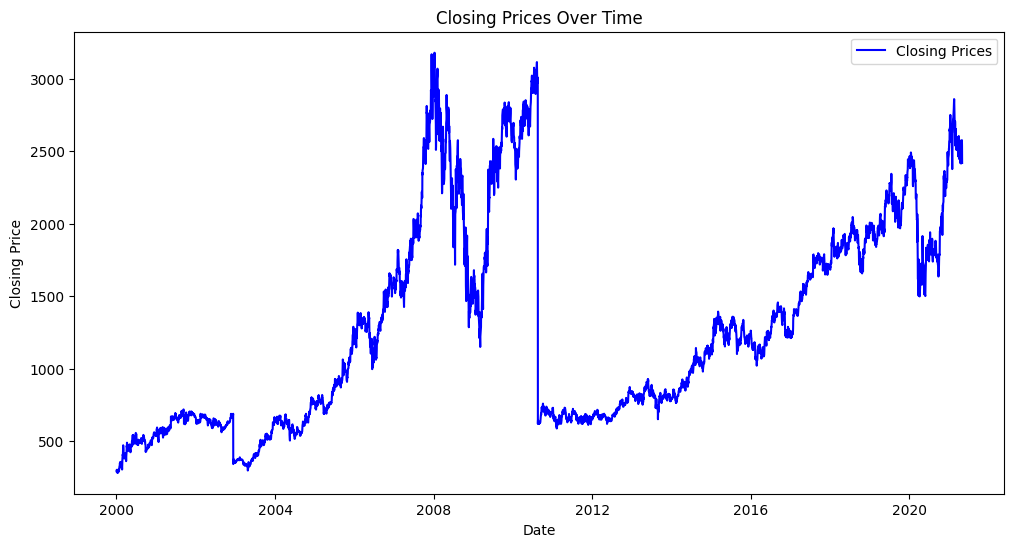

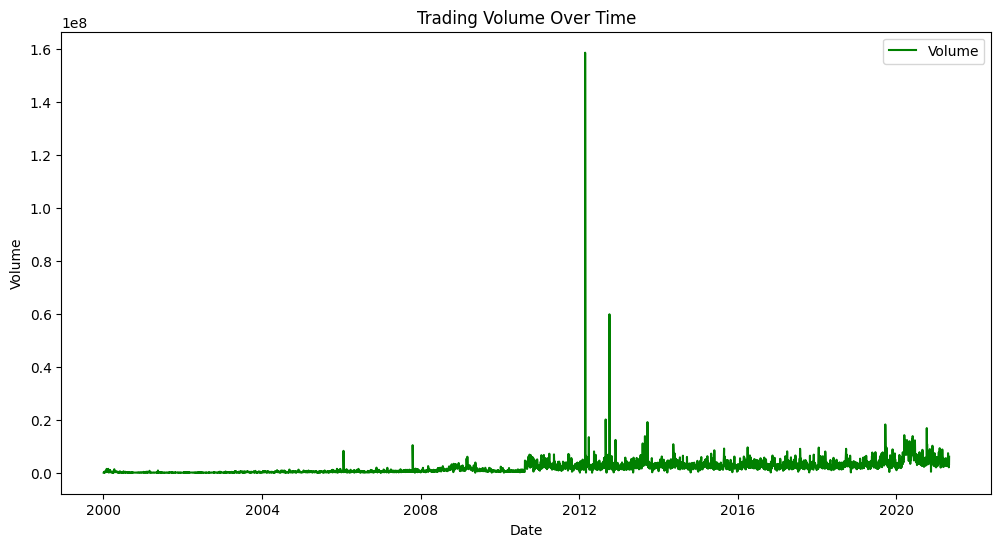

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
hdfc_data['Date'] = pd.to_datetime(hdfc_data['Date'])

# Set 'Date' as the index for time series plotting
hdfc_data.set_index('Date', inplace=True)
# Plotting Closing Prices Over Time
plt.figure(figsize=(12, 6))
plt.plot(hdfc_data['Close'], label='Closing Prices', color='blue')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()
# Plotting Volume Over Time
plt.figure(figsize=(12, 6))
plt.plot(hdfc_data['Volume'], label='Volume', color='green')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [57]:
hdfc_data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,
2000-01-03,HDFC,EQ,271.75,293.50,293.50,293.50,293.50,293.50,293.50,22744,6.675364e+11,1.329440e+06,0.653088
2000-01-04,HDFC,EQ,293.50,317.00,317.00,297.00,304.00,304.05,303.62,255251,7.749972e+12,1.329440e+06,0.653088
2000-01-05,HDFC,EQ,304.05,290.00,303.90,285.00,295.00,292.80,294.53,269087,7.925368e+12,1.329440e+06,0.653088
2000-01-06,HDFC,EQ,292.80,301.00,314.00,295.00,296.00,296.45,300.14,305916,9.181669e+12,1.329440e+06,0.653088
2000-01-07,HDFC,EQ,296.45,290.00,296.35,281.00,287.10,286.55,288.80,197039,5.690480e+12,1.329440e+06,0.653088
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,HDFC,EQ,2497.35,2500.00,2534.10,2483.20,2502.00,2509.80,2508.07,3916088,9.821805e+14,2.440395e+06,0.623200
2021-04-27,HDFC,EQ,2509.80,2494.15,2526.80,2486.25,2514.00,2518.40,2509.18,2040799,5.120730e+14,1.040749e+06,0.510000
2021-04-28,HDFC,EQ,2518.40,2516.10,2609.00,2508.30,2575.00,2577.00,2574.21,3407461,8.771527e+14,1.815110e+06,0.532700


In [58]:
import plotly.express as px
# Assuming 'Date' column is already in datetime format
hdfc_data.index = pd.to_datetime(hdfc_data.index)
# Plotting Closing Prices Over Time with Plotly Express
fig_close = px.line(hdfc_data, x=hdfc_data.index, y='Close', title='Closing Prices Over Time')
fig_close.update_layout(xaxis_title='Date', yaxis_title='Closing Price')
fig_close.show()
# Plotting Volume Over Time with Plotly Express
fig_volume = px.line(hdfc_data, x=hdfc_data.index, y='Volume', title='Trading Volume Over Time')
fig_volume.update_layout(xaxis_title='Date', yaxis_title='Volume')
fig_volume.show()

**Statical Analysis:**

In [59]:
# Summary statistics for key features
summary_stats = hdfc_data[['Open', 'High', 'Low', 'Close', 'Volume', 'Turnover', 'Deliverable Volume', '%Deliverble']].describe()
# Display summary statistics
print(summary_stats)

              Open         High          Low        Close        Volume  \
count  5306.000000  5306.000000  5306.000000  5306.000000  5.306000e+03   
mean   1284.393074  1304.269732  1263.297842  1284.071005  1.848187e+06   
std     709.703665   721.308080   697.450309   709.430515  2.991387e+06   
min     284.000000   290.500000   273.250000   283.850000  2.919000e+03   
25%     669.712500   677.512500   660.000000   668.662500  3.034970e+05   
50%    1135.400000  1156.725000  1119.000000  1136.675000  1.337788e+06   
75%    1813.812500  1835.000000  1783.075000  1811.787500  2.732310e+06   
max    3148.000000  3262.000000  3100.550000  3180.150000  1.584141e+08   

           Turnover  Deliverable Volume  %Deliverble  
count  5.306000e+03        5.306000e+03  5306.000000  
mean   2.620759e+14        1.329440e+06     0.653088  
std    3.607844e+14        2.429407e+06     0.121814  
min    1.834686e+11        1.786000e+03     0.119000  
25%    2.461178e+13        3.050202e+05     0.586

**Correlation Analysis:**

In [60]:
# Calculate correlations
correlation_matrix = hdfc_data.corr()
# Print correlations with 'Close' feature
print("Correlations with 'Close':")
print(correlation_matrix['Close'].sort_values(ascending=False))
# Visualize correlations using a scatter plot matrix with Plotly Express
fig = px.scatter_matrix(
    hdfc_data[['Open', 'High', 'Low', 'Close', 'Volume', 'Turnover', 'Deliverable Volume', '%Deliverble']],
    dimensions=['Open', 'High', 'Low', 'Close', 'Volume', 'Turnover', 'Deliverable Volume', '%Deliverble'],
    title='Scatter Plot Matrix of Financial Data',
    color='Close',
    height=800,
)
# Show the plot
fig.show()

Correlations with 'Close':
Close                 1.000000
Last                  0.999960
VWAP                  0.999826
High                  0.999466
Low                   0.999403
Open                  0.998928
Prev Close            0.997699
Turnover              0.416303
Volume                0.117280
Deliverable Volume    0.012161
%Deliverble          -0.299633
Name: Close, dtype: float64


<ipython-input-60-542dd0374ca5>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [61]:
import plotly.express as px
# Visualize correlations using a heatmap with Plotly Express
fig = px.imshow(
    correlation_matrix,
    labels=dict(x="Features", y="Features", color="Correlation"),
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    color_continuous_scale='Viridis',  # Replace 'coolwarm' with a valid colorscale
    title='Correlation Heatmap',
)
# Show the plot
fig.show()
# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                    Prev Close      Open      High       Low      Last  \
Prev Close            1.000000  0.998656  0.998095  0.998008  0.997662   
Open                  0.998656  1.000000  0.999306  0.999326  0.998897   
High                  0.998095  0.999306  1.000000  0.998895  0.999428   
Low                   0.998008  0.999326  0.998895  1.000000  0.999365   
Last                  0.997662  0.998897  0.999428  0.999365  1.000000   
Close                 0.997699  0.998928  0.999466  0.999403  0.999960   
VWAP                  0.998143  0.999405  0.999656  0.999632  0.999789   
Volume                0.117363  0.116958  0.117639  0.116228  0.117330   
Turnover              0.415067  0.415590  0.416765  0.415140  0.416396   
Deliverable Volume    0.012795  0.012258  0.012138  0.011753  0.012151   
%Deliverble          -0.298564 -0.298639 -0.302566 -0.295720 -0.299823   

                       Close      VWAP    Volume  Turnover  \
Prev Close          0.997699 

#### Correlation Matrix Insights

##### Price-related Features:
- 'Close' is highly positively correlated with 'Last', 'VWAP', 'High', 'Low', and 'Open'.
- These features exhibit strong linear relationships, reflecting various representations of closing prices.

##### Volume and Turnover:
- 'Volume' has low correlation with price-related features, suggesting weak linear dependence on prices.
- 'Turnover' has moderate positive correlation with price-related features, indicating some relationship between market turnover and stock prices.

##### Deliverable Volume:
- 'Deliverable Volume' is highly positively correlated with 'Volume', indicating that a significant portion of traded volume corresponds to deliverable volume.

##### %Deliverble:
- '%Deliverble' has negative correlations with price-related features, suggesting a tendency for the percentage of deliverable volume to decrease as prices increase.

In summary, the price-related features show strong correlations, while trading volume has a weak linear relationship with prices. Deliverable volume is closely tied to total volume, and the percentage of deliverable volume tends to decrease with rising prices.

**Lag Analysis:**

In [62]:
# Define lag periods you want to analyze
lag_periods = [1, 3, 5, 10]
# Create lag features
for lag in lag_periods:
    hdfc_data[f'Close_Lag_{lag}'] = hdfc_data['Close'].shift(lag)

In [63]:
# Create a line chart with Plotly Express
fig = px.line(hdfc_data, x=hdfc_data.index, y=[f'Close_Lag_{lag}' for lag in lag_periods],
              labels={'value': 'Closing Price', 'variable': 'Lag Period'},
              title='Autocorrelation of Closing Prices with Different Lags',
              template='plotly_dark')

# Show the figure
fig.show()

**Feature Scaling and Normalizing:**

In [64]:
from sklearn.preprocessing import StandardScaler
# Scaling and Normalization
Scale = StandardScaler()

def data_prep(df, lookback, future, scaler):
    date_train = pd.to_datetime(df.index)
    df_train = df[['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume']].astype(float)
    df_train_scaled = scaler.fit_transform(df_train)
    X, y = [], []
    for i in range(lookback, len(df_train_scaled)-future+1):
        X.append(df_train_scaled[i-lookback:i, :])
        y.append(df_train_scaled[i+future-1:i+future, 0])
    return np.array(X), np.array(y), df_train, date_train

**LSTM Training and Hyperparamters:**

In [65]:
# Parameters
lookback_window, future_time_steps = 30, 1
# Data preparation using the function
Lstm_x, Lstm_y, hdfc_data, date_train = data_prep(hdfc_data, lookback_window, future_time_steps, Scale)

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
import tensorflow as tf

def Lstm_model1(X, y):
    regressor = Sequential()
    for _ in range(3):
        regressor.add(LSTM(units=50, return_sequences=True))
        regressor.add(Dropout(0.2))
    regressor.add(LSTM(units=50))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error')
    es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
    history = regressor.fit(X, y, epochs=100, validation_split=0.1, batch_size=64, verbose=1, callbacks=[es])
    return regressor, history

In [67]:
model, history = Lstm_model1(Lstm_x, Lstm_y)

Epoch 1/100
75/75 [==============================] - 11s 43ms/step - loss: 0.1111 - val_loss: 0.0567
Epoch 2/100
75/75 [==============================] - 1s 17ms/step - loss: 0.0357 - val_loss: 0.0270
Epoch 3/100
75/75 [==============================] - 1s 13ms/step - loss: 0.0340 - val_loss: 0.0318
Epoch 4/100
75/75 [==============================] - 1s 13ms/step - loss: 0.0315 - val_loss: 0.0195
Epoch 5/100
75/75 [==============================] - 1s 13ms/step - loss: 0.0266 - val_loss: 0.0170
Epoch 6/100
75/75 [==============================] - 1s 12ms/step - loss: 0.0253 - val_loss: 0.0174
Epoch 7/100
75/75 [==============================] - 1s 13ms/step - loss: 0.0218 - val_loss: 0.0141
Epoch 8/100
75/75 [==============================] - 1s 13ms/step - loss: 0.0192 - val_loss: 0.0229
Epoch 9/100
75/75 [==============================] - 1s 13ms/step - loss: 0.0194 - val_loss: 0.0146
Epoch 10/100
75/75 [==============================] - 1s 13ms/step - loss: 0.0180 - val_loss: 0.013

In [68]:
# Predicts opening values using a neural network model and returns descaled predictions and forecasting dates.
def predict_open(model, date_train, Lstm_x, df_train, future, Scale):
    forecasting_dates = pd.date_range(list(date_train)[-1], periods=future, freq='1d').tolist()
    predicted = model.predict(Lstm_x[-future:])
    predicted1 = np.repeat(predicted, df_train.shape[1], axis=-1)
    predicted_descaled = Scale.inverse_transform(predicted1)[:, 0]
    return predicted_descaled, forecasting_dates

In [69]:
# Prepares the final output DataFrame with dates and predicted descaled opening values.
def output_prep(forecasting_dates, predicted_descaled):
    dates = [i.date() for i in forecasting_dates]
    df_final = pd.DataFrame(columns=['Date', 'Open'])
    df_final['Date'] = pd.to_datetime(dates)
    df_final['Open'] = predicted_descaled
    return df_final

In [70]:
# Predict opening values using the model, prepare the final output DataFrame, and print the first few rows.
predicted_descaled, forecasting_dates = predict_open(model, date_train, Lstm_x, hdfc_data, future_time_steps, Scale)
results = output_prep(forecasting_dates, predicted_descaled)
print(results.head())

1/1 [==============================] - 3s 3s/step
        Date         Open
0 2021-04-30  2599.974854


**Visualization of Loss**

In [71]:
# Model Loss
fig = px.line(
    x=range(1, len(history.history['loss']) + 1),
    y=[history.history['loss'], history.history['val_loss']],
    labels={'x': 'Epoch', 'y': 'Loss'},
    title='Model Loss',
    line_shape='linear',
    line_dash_sequence=['solid', 'dash'],
    color_discrete_sequence=['blue', 'red'],
    markers=['circle', 'x']
)
fig.update_layout(legend={'itemsizing': 'constant'})
fig.show()